In [1]:
import cartopy.crs as ccrs
from typhon.plots.maps import get_cfeatures_at_scale
import matplotlib.pyplot as plt
from netCDF4 import Dataset
%matplotlib inline

In [2]:
def plot_file(casename):
    plt.figure(figsize=[20, 15])

    subcases = ['rld', 'rlu']
    for axid, subcase in enumerate(subcases):
        ax = plt.subplot(len(subcases), 1, axid+1,
                         projection=ccrs.PlateCarree())
        features = get_cfeatures_at_scale(scale='50m')
        ax.add_feature(features.BORDERS)
        ax.add_feature(features.COASTLINE)
        with Dataset(f'out/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p1f1_gn_{casename}.nc', 'r') as ds:
            ax = ax.scatter(ds['lon'][:], ds['lat'][:],
                            s=180, c=ds[subcase][:][0, :, 30])
        plt.title(f'{subcase} {casename}')

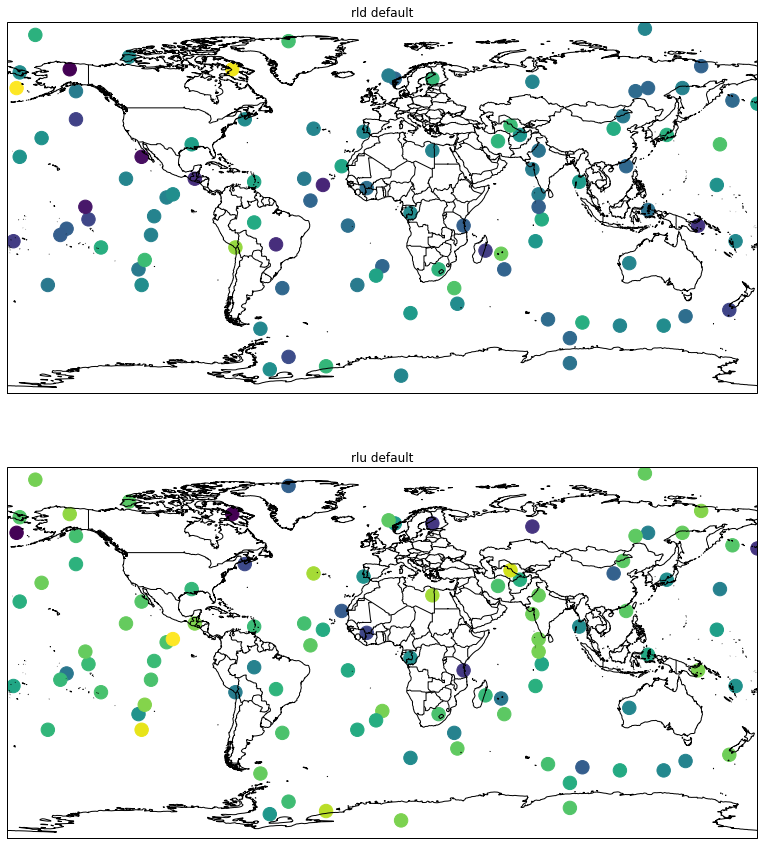

In [3]:
plot_file('default')

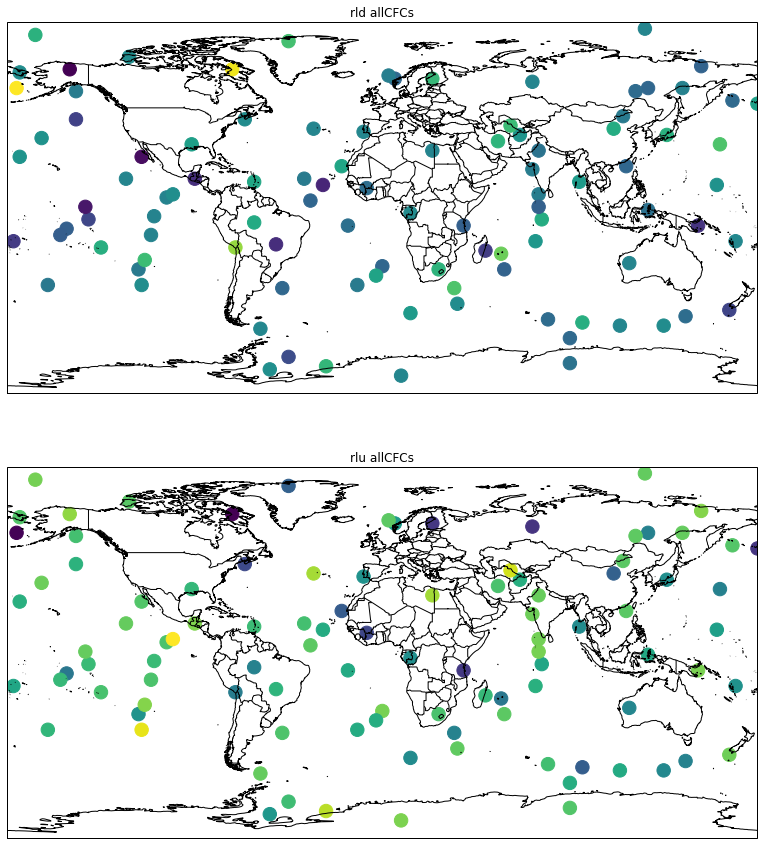

In [4]:
plot_file('allCFCs')